In [31]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.metrics import f1_score
# Data analysis packages:
import pandas as pd
import numpy as np
#from datetime import datetime as dt

# Visualization packages:
import seaborn as sns
import matplotlib.pyplot as plt





filename = 'df_imputed_scaled_OHE.pkl'
df = pd.read_pickle(filename)

X = df[df.columns[:-1]]
y = pd.Series(df['heartdisease'])



In [26]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold,StratifiedKFold #for K-fold cross validation
from sklearn.ensemble import RandomForestClassifier #Random Forest

# The "accuracy" scoring is proportional to the number of correct classifications
kfold = StratifiedKFold(n_splits=10, random_state=1) # k=10, split the data into 10 equal parts
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=kfold,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(X, y)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X.columns[rfecv.support_])
print('Original features :', X.columns)

Optimal number of features : 16
Best features : Index(['age', 'sex_0', 'sex_1', 'cp_2', 'cp_3', 'cp_4', 'trestbps', 'chol',
       'fbs_0', 'restecg', 'thalach', 'exang_0', 'exang_1', 'oldpeak',
       'slope_1', 'slope_2'],
      dtype='object')
Original features : Index(['age', 'sex_0', 'sex_1', 'cp_1', 'cp_2', 'cp_3', 'cp_4', 'trestbps',
       'chol', 'fbs_0', 'fbs_1', 'restecg', 'thalach', 'exang_0', 'exang_1',
       'oldpeak', 'slope_1', 'slope_2', 'slope_3'],
      dtype='object')


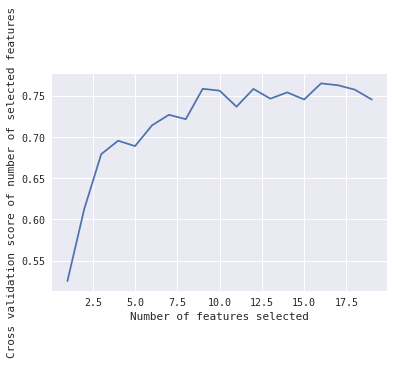

In [27]:
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

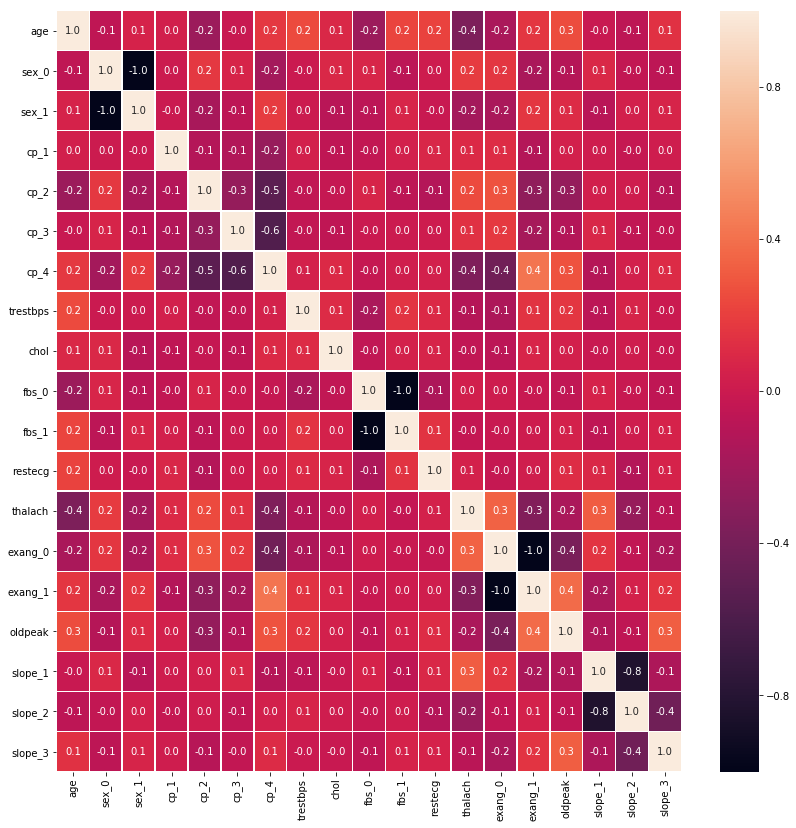

In [17]:
#correlation map
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

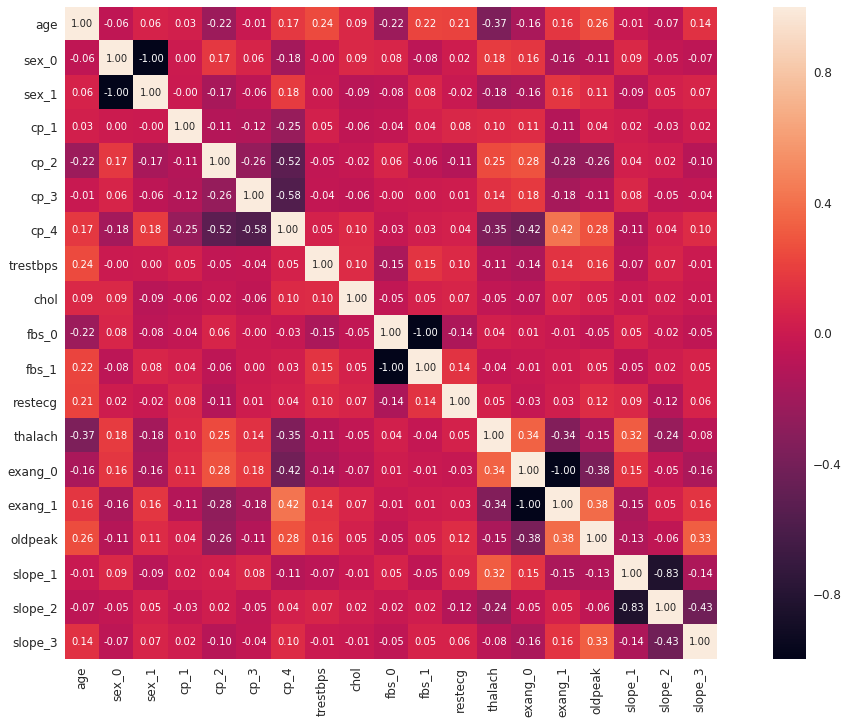

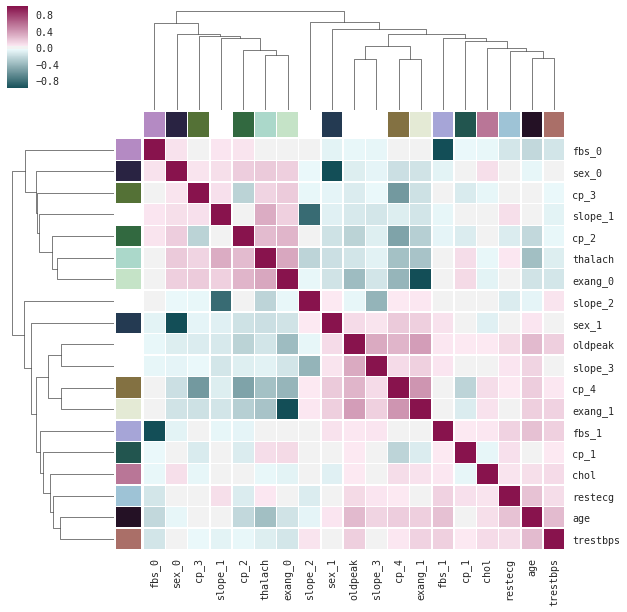

In [20]:
from sklearn.cluster import FeatureAgglomeration
# Data analysis packages:
import pandas as pd
import numpy as np
#from datetime import datetime as dt

# Visualization packages:
import seaborn as sns
import matplotlib.pyplot as plt

#filename = 'df_imputed_tot.pkl'
#df_total = pd.read_pickle(filename)

#filename = 'df_imputed_tot_OHE.pkl'
#df_total = pd.read_pickle(filename)


df_total = df

#filename = 'TotalDataBase.pkl'
#df_total = pd.read_pickle(filename)

#df_total = df_total.drop_duplicates(keep='first')


# Heatmap of feature correlations

#plt.figure(figsize=(10, 8))
correlations = df_total.corr()
#sns.heatmap(correlations, vmax=0.8, square=True)
#plt.show()






def extract_numerical_features(df):
    df = df.copy()
    # Identify numerical columns which are of type object
    numerical_features = pd.Series(data=False, index=df.columns, dtype=bool)

    for feature in df.columns:
        if any(tuple(df[feature].apply(lambda x: type(x)) == int)) or \
                any(tuple(df[feature].apply(lambda x: type(x)) == float)) & \
                (not any(tuple(df[feature].apply(lambda x: type(x)) == str))):
            numerical_features[feature] = 1
    return numerical_features[numerical_features == 1].index

    # Zoom of heatmap with coefficients


'''
plt.figure(figsize=(22, 14))
correlations = df_total[extract_numerical_features(df_total)].corr()
sns.heatmap(correlations, vmax=0.8, square=True)
plt.show()
'''

'''df_sin_target = pd.DataFrame(
    data=df_total[df_total.columns[
        df_total.columns != 'heartdisease']].values, columns=df_total.columns[
        df_total.columns != 'heartdisease'])'''
num_features = extract_numerical_features(df_total)
#num_features = extract_numerical_features(df_sin_target)


df_aglo = pd.DataFrame(data=df_total.values, columns=df_total.columns)


df_total = df_aglo[X.columns]
#df_total = df_total[num_features]
plt.figure(figsize=(20, 12))
top_features = 10

correlation_coeff = np.corrcoef(df_total.astype(float).values.T)
sns.set(font_scale=1.20)
coeff_heatmap = sns.heatmap(correlation_coeff, annot=True, cbar=True,
                            square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=df_total.columns, xticklabels=df_total.columns)
plt.show()



number_of_clusters=int(df_total.shape[1]/1.2)
# Create Dendrogram
agglomerated_features = FeatureAgglomeration(n_clusters=number_of_clusters)
used_networks = np.arange(0, number_of_clusters, dtype=int)
# used_networks = np.unique(agglomerated_features.labels_)

# In our case all columns are clustered, which means used_columns is true in every element
# used_columns = (df.columns.get_level_values(None)
                # .astype(int)
                # .isin(used_networks))
# used_columns = (agglomerated_feature_labels.astype(int).isin(used_networks))
# df = df.loc[:, used_columns]

# Create a custom palette to identify the networks
network_pal = sns.cubehelix_palette(len(used_networks),
                                    light=.9, dark=.1, reverse=True,
                                    start=1, rot=-2)
network_lut = dict(zip(map(str, df_total.columns), network_pal))

# Convert the palette to vectors that will be drawn on the side of the matrix
networks = df_total.columns.get_level_values(None)
network_colors = pd.Series(networks, index=df_total.columns).map(network_lut)
sns.set(font="monospace")
# Create custom colormap
cmap = sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=30, as_cmap=True)
cg = sns.clustermap(df_total.astype(float).corr(), cmap=cmap, linewidths=.5,
                    row_colors=network_colors, col_colors=network_colors)
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.setp(cg.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.show()

Feature ranking:
1. feature 0 (0.129101)
2. feature 12 (0.120325)
3. feature 8 (0.114134)
4. feature 15 (0.101901)
5. feature 6 (0.101344)
6. feature 14 (0.083847)
7. feature 7 (0.077934)
8. feature 13 (0.062198)
9. feature 4 (0.049948)
10. feature 1 (0.033930)
11. feature 11 (0.025843)
12. feature 5 (0.019666)
13. feature 2 (0.018112)
14. feature 16 (0.017271)
15. feature 17 (0.013095)
16. feature 10 (0.011102)
17. feature 3 (0.008335)
18. feature 9 (0.008133)
19. feature 18 (0.003781)


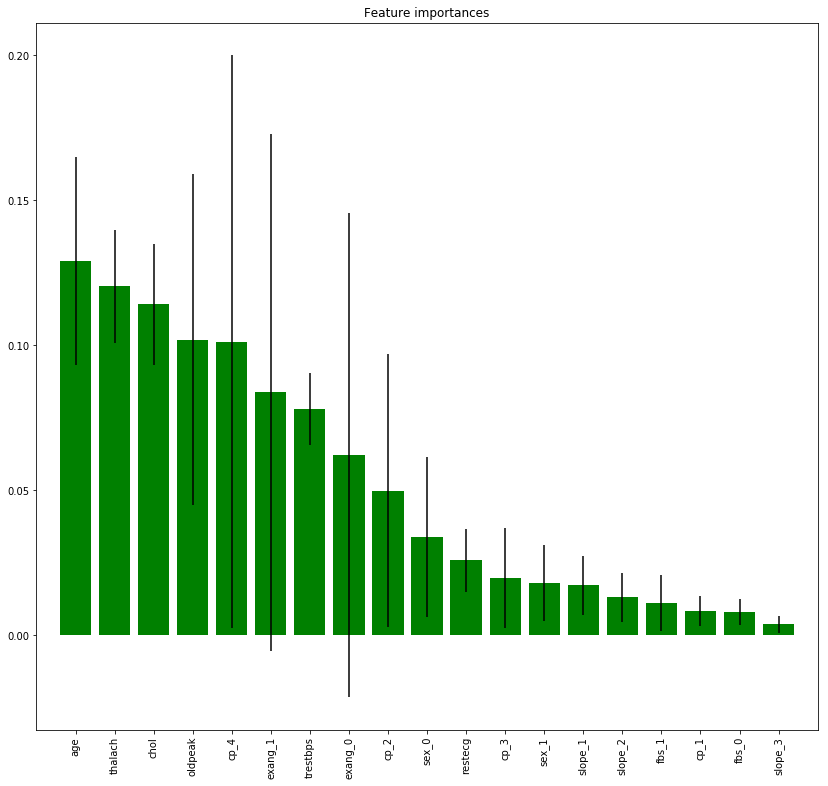

In [15]:
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(X,y)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clr_rf_5.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices],rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

Text(0,0.5,'explained_variance_ratio_')

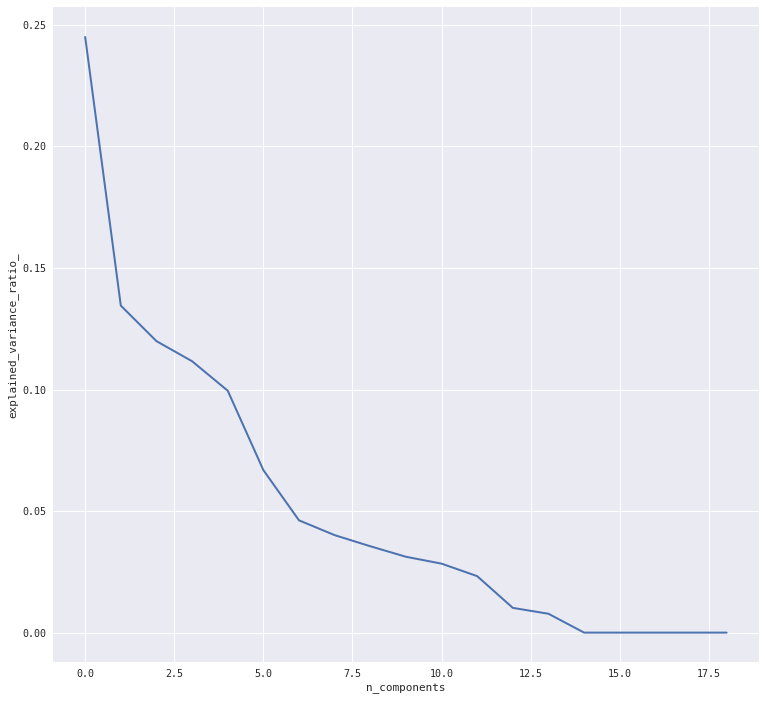

In [28]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)

plt.figure(1, figsize=(14, 13))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

[0.10892915 0.02233206 0.05020029 0.01461782 0.09161085 0.03249374
 0.06411451 0.09082874 0.09695464 0.0151022  0.01243006 0.04239114
 0.10756057 0.05234498 0.06536297 0.08737773 0.01801516 0.01762399
 0.0097094 ]
Feature ranking:
1. feature 0 (0.108929)
2. feature 12 (0.107561)
3. feature 8 (0.096955)
4. feature 4 (0.091611)
5. feature 7 (0.090829)
6. feature 15 (0.087378)
7. feature 14 (0.065363)
8. feature 6 (0.064115)
9. feature 13 (0.052345)
10. feature 2 (0.050200)
11. feature 11 (0.042391)
12. feature 5 (0.032494)
13. feature 1 (0.022332)
14. feature 16 (0.018015)
15. feature 17 (0.017624)
16. feature 9 (0.015102)
17. feature 3 (0.014618)
18. feature 10 (0.012430)
19. feature 18 (0.009709)


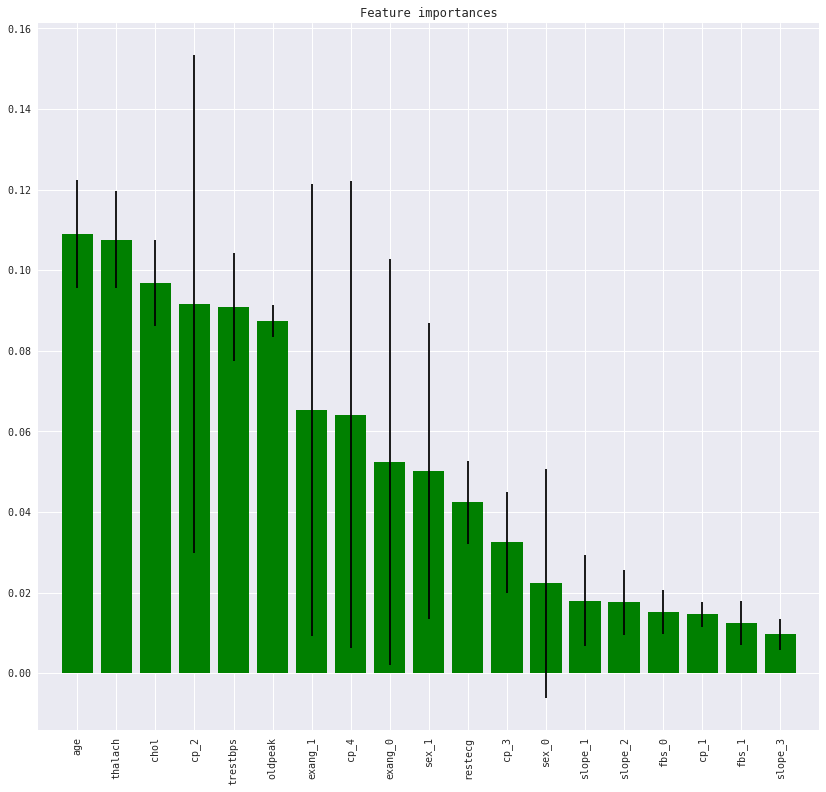

In [34]:
# fit an Extra Trees model to the data
model = ExtraTreesClassifier()
model.fit(X, y)
# display the relative importance of each attribute
print(model.feature_importances_)

importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices],rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [36]:
drop_list = ['slope_3', 'slope_2', 'slope_1', 'fbs_1','cp_2', 'fbs_0']
df_new = df.drop(drop_list, axis=1)
filename = 'df_imputed_scaled_OHE_reduced.pkl'
df_new.to_pickle(filename)

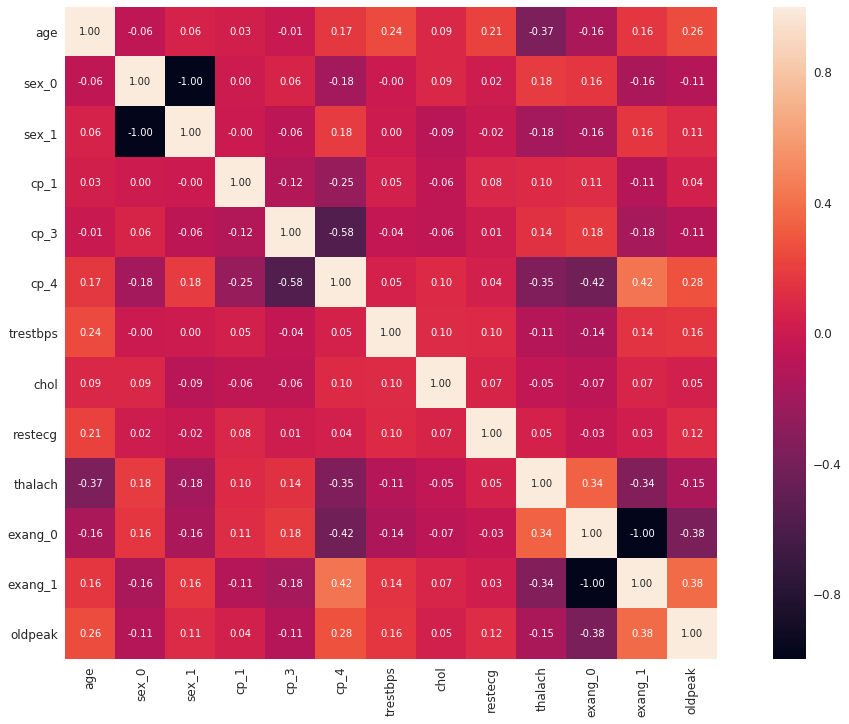

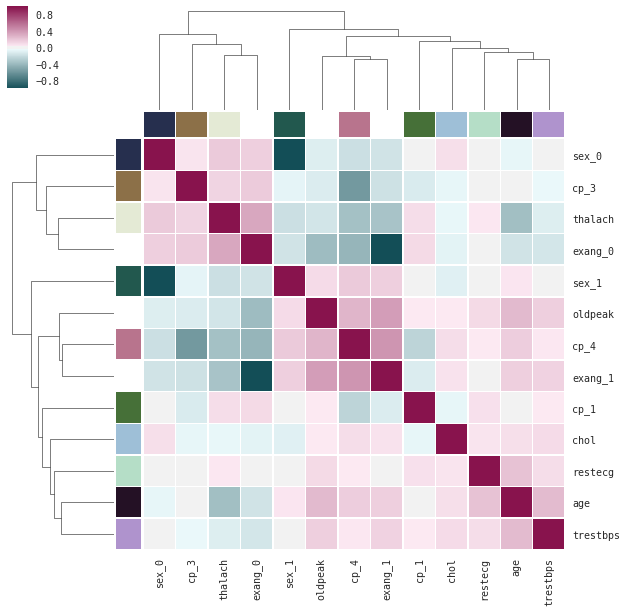

In [38]:
from sklearn.cluster import FeatureAgglomeration
# Data analysis packages:
import pandas as pd
import numpy as np
#from datetime import datetime as dt

# Visualization packages:
import seaborn as sns
import matplotlib.pyplot as plt

#filename = 'df_imputed_tot.pkl'
#df_total = pd.read_pickle(filename)

#filename = 'df_imputed_tot_OHE.pkl'
#df_total = pd.read_pickle(filename)



df_total = df_new
X = df_new[df_new.columns[:-1]]
y = pd.Series(df_new['heartdisease'])

#filename = 'TotalDataBase.pkl'
#df_total = pd.read_pickle(filename)

#df_total = df_total.drop_duplicates(keep='first')


# Heatmap of feature correlations

#plt.figure(figsize=(10, 8))
correlations = df_total.corr()
#sns.heatmap(correlations, vmax=0.8, square=True)
#plt.show()






def extract_numerical_features(df):
    df = df.copy()
    # Identify numerical columns which are of type object
    numerical_features = pd.Series(data=False, index=df.columns, dtype=bool)

    for feature in df.columns:
        if any(tuple(df[feature].apply(lambda x: type(x)) == int)) or \
                any(tuple(df[feature].apply(lambda x: type(x)) == float)) & \
                (not any(tuple(df[feature].apply(lambda x: type(x)) == str))):
            numerical_features[feature] = 1
    return numerical_features[numerical_features == 1].index

    # Zoom of heatmap with coefficients


'''
plt.figure(figsize=(22, 14))
correlations = df_total[extract_numerical_features(df_total)].corr()
sns.heatmap(correlations, vmax=0.8, square=True)
plt.show()
'''

'''df_sin_target = pd.DataFrame(
    data=df_total[df_total.columns[
        df_total.columns != 'heartdisease']].values, columns=df_total.columns[
        df_total.columns != 'heartdisease'])'''
num_features = extract_numerical_features(df_total)
#num_features = extract_numerical_features(df_sin_target)


df_aglo = pd.DataFrame(data=df_total.values, columns=df_total.columns)


df_total = df_aglo[X.columns]
#df_total = df_total[num_features]
plt.figure(figsize=(20, 12))
top_features = 10

correlation_coeff = np.corrcoef(df_total.astype(float).values.T)
sns.set(font_scale=1.20)
coeff_heatmap = sns.heatmap(correlation_coeff, annot=True, cbar=True,
                            square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=df_total.columns, xticklabels=df_total.columns)
plt.show()



number_of_clusters=int(df_total.shape[1]/1.2)
# Create Dendrogram
agglomerated_features = FeatureAgglomeration(n_clusters=number_of_clusters)
used_networks = np.arange(0, number_of_clusters, dtype=int)
# used_networks = np.unique(agglomerated_features.labels_)

# In our case all columns are clustered, which means used_columns is true in every element
# used_columns = (df.columns.get_level_values(None)
                # .astype(int)
                # .isin(used_networks))
# used_columns = (agglomerated_feature_labels.astype(int).isin(used_networks))
# df = df.loc[:, used_columns]

# Create a custom palette to identify the networks
network_pal = sns.cubehelix_palette(len(used_networks),
                                    light=.9, dark=.1, reverse=True,
                                    start=1, rot=-2)
network_lut = dict(zip(map(str, df_total.columns), network_pal))

# Convert the palette to vectors that will be drawn on the side of the matrix
networks = df_total.columns.get_level_values(None)
network_colors = pd.Series(networks, index=df_total.columns).map(network_lut)
sns.set(font="monospace")
# Create custom colormap
cmap = sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=30, as_cmap=True)
cg = sns.clustermap(df_total.astype(float).corr(), cmap=cmap, linewidths=.5,
                    row_colors=network_colors, col_colors=network_colors)
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.setp(cg.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.show()